1. take some picture as an input
2. using a quantum algorithm, generate a 'quantum seed' : basically row by row (starting from top) you want to splash a special shape in random columns
(example of a special shape:
 +
+++
 +
)
3. the quantum algo output will also take a seed 
4. the outputed image will have the timestamp / hex of the outputed list of lists in a corner
5. the goal is to output unique, unpredicatbly scrambled images


losowość ustala kolejność nakładania się na siebie powiększonych pikseli (powiekszkonych do jakichś ustalonych kształtów typu plus)

3x3 pixel -> 6x6 mapa do stamplowania (będzie 9 stampli)
  ++
 +++++
  ++

In [2]:
import quantumblur as qb
from PIL import Image
from random import shuffle

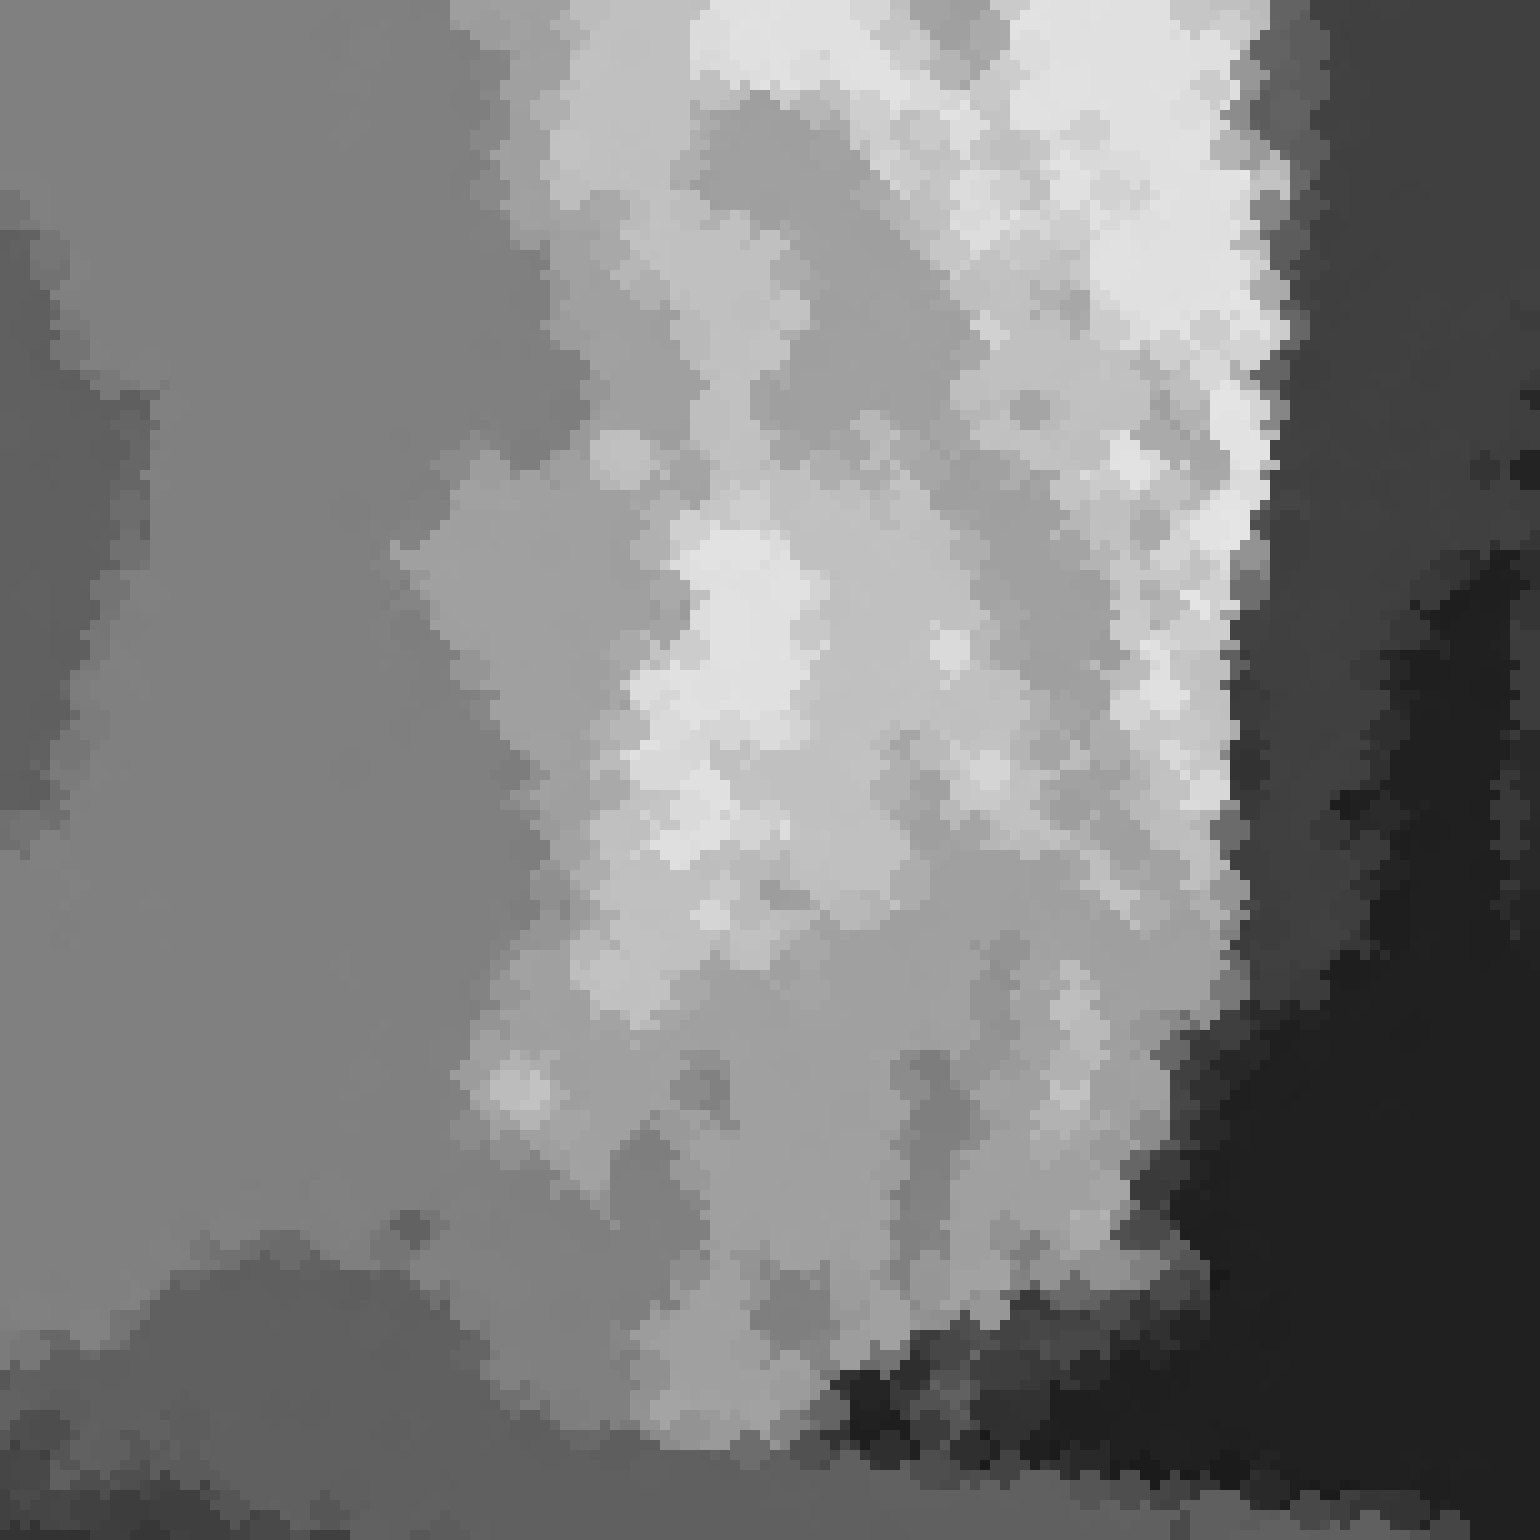

In [4]:
img = Image.open('clear_gray_sky.jpg')

X_MAX, Y_MAX = img.size

def extract_colors(img, x_size, y_size):
    pixels = img.load()
    colors = []
    
    for x in range(x_size):
        row = []
        for y in range(y_size):
            row.append(pixels[x, y])
        colors.append(row)
    return colors

# Upscale image by scale factor
def upscale_image(img, scale):
  width, height = img.size
  new_width = width * scale
  new_height = height * scale

  new_img = Image.new('RGB', (new_width, new_height))
  pixels = new_img.load()

  for x in range(new_width):
    for y in range(new_height):
      # Get pixel from original image
      orig_x = x // scale
      orig_y = y // scale
      orig_pixel = img.getpixel((orig_x, orig_y))

      # Set scaled pixel  
      pixels[x, y] = orig_pixel

  return new_img


def random_stamp_order(x_size, y_size):
    l = [(x, y) for x in range(x_size) for y in range(y_size)]
    shuffle(l)
    return l


def _stamp_in_location(img, location, y_max, x_max, color):
    y, x = location
    pixels = img.load()
    
    # those will 100% fit
    pixels[x*2, y*2] = color
    pixels[x*2, y*2+1] = color
    pixels[x*2+1, y*2] = color
    pixels[x*2+1, y*2+1] = color
    
    # those won't fit near the edges
    if x != 0:
        pixels[x*2-1, y*2] = color
        pixels[x*2-1, y*2+1] = color
    
    if y != 0:
        pixels[x*2, y*2-1] = color
        pixels[x*2+1, y*2-1] = color

    if y < y_max - 1:
        pixels[x*2, y*2+2] = color
        pixels[x*2+1, y*2+2] = color
        
    
        
    if x < x_max - 1:
        pixels[x*2+2, y*2+1] = color
        pixels[x*2+2, y*2] = color

    return img


def stamp_all(img, original_rgb_list, order, y_max, x_max):
    two_x_img = upscale_image(img, 2)
    for (x, y) in order:
        img = _stamp_in_location(two_x_img, (x, y), y_max, x_max, color=original_rgb_list[y][x])
    return img

order = random_stamp_order(X_MAX, Y_MAX)
original_rgb_list = extract_colors(img, X_MAX, Y_MAX)
result = stamp_all(img, original_rgb_list, order, Y_MAX, X_MAX)
result
upscale_image(result, 10)